In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.DataFrame()
df = pd.read_csv('Alcohol_Sales.csv',index_col = 'DATE',parse_dates = True)
df.index.freq = 'MS'
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


<ipython-input-3-9bfc935cb044>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coulmns = ['S4248SM144NCEN']


,S4248SM144NCEN,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


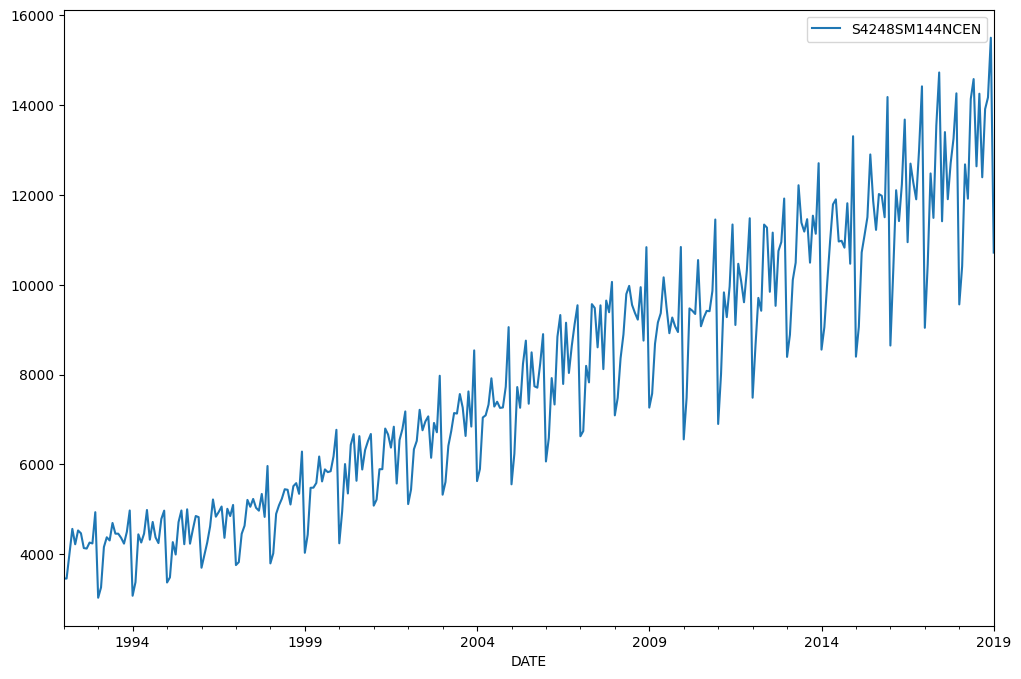

In [3]:
df.coulmns = ['S4248SM144NCEN']
df.plot(figsize=(12,8))
df['Sale_LastMonth'] = df['S4248SM144NCEN'].shift(+1)
df['Sale_2Monthsback'] = df['S4248SM144NCEN'].shift(+2)
df['Sale_3Monthsback'] = df['S4248SM144NCEN'].shift(+3)
df

In [4]:
df = df.dropna()
df

,S4248SM144NCEN,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [5]:
lin_model = LinearRegression()
model = RandomForestRegressor(n_estimators = 100,max_features = 3,random_state = 1)

In [6]:
x1,x2,x3,y = df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['S4248SM144NCEN']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis = 1)
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

<ipython-input-7-b5d88fe41c85>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


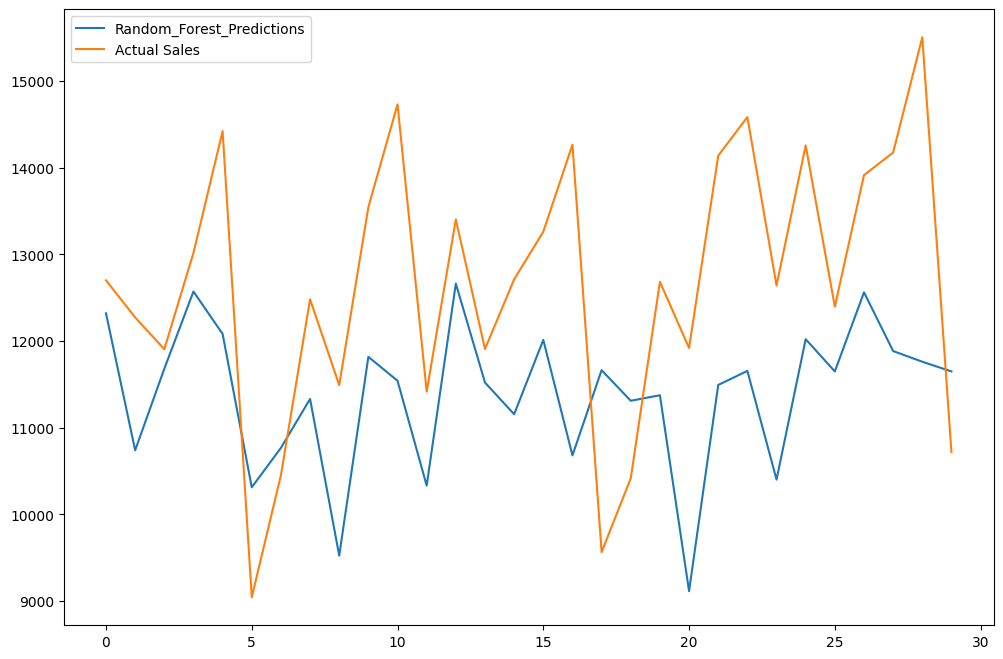

In [7]:
X_train,X_test,y_train,y_test = final_x[:-30],final_x[-30:],y[:-30],y[-30:]
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)
pred = model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label = 'Random_Forest_Predictions')
plt.plot(y_test,label = 'Actual Sales')
plt.legend(loc='upper left')
plt.show()

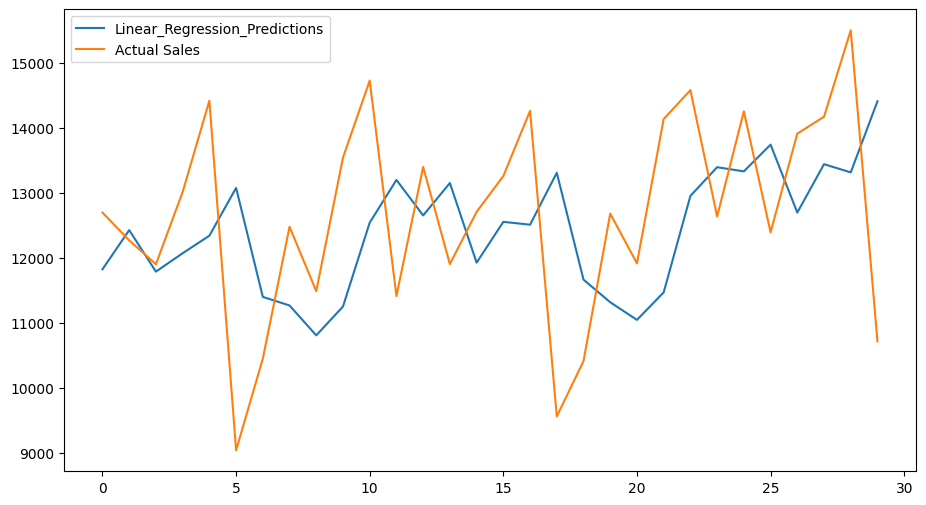

In [8]:
lin_pred = lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label = 'Actual Sales')
plt.legend(loc='upper left')
plt.show()

In [9]:
rmse_rf = sqrt(mean_squared_error(pred,y_test))
rmse_lr = sqrt(mean_squared_error(lin_pred,y_test))
print('Mean Squarred Error for Random Forest Module is:',rmse_rf)
print('Mean Squarred Error for Linear Regression is:',rmse_lr)

Mean Squarred Error for Random Forest Module is: 1913.7762399350665
Mean Squarred Error for Linear Regression is: 1791.496523275983
